In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../output/pipeline_descriptor_gabor_results.csv')
df.shape

(108, 6)

In [4]:
df.head(10)

,model,labels,precision,recall,f1-score,support
0,knn,homer,0.000000,0.000000,0.000000,25.000000
1,knn,marge,0.000000,0.000000,0.000000,10.000000
2,knn,bart,0.000000,0.000000,0.000000,35.000000
3,knn,lisa,0.122642,1.000000,0.218487,13.000000
4,knn,maggie,0.000000,0.000000,0.000000,12.000000
5,knn,family,0.000000,0.000000,0.000000,11.000000
6,knn,accuracy,0.122642,0.122642,0.122642,0.122642
7,knn,macro avg,0.020440,0.166667,0.036415,106.000000
8,knn,weighted avg,0.015041,0.122642,0.026796,106.000000
9,nb,homer,0.235849,1.000000,0.381679,25.000000


In [9]:
df[df['labels'] == 'weighted avg'][['model', 'recall']]

,model,recall
8,knn,0.122642
17,nb,0.235849
26,lsvc,0.330189
35,svc,0.330189
44,lr,0.330189
53,rf,0.330189
62,lgbm,0.330189
71,xgb,0.330189
80,ab,0.330189
89,et,0.330189


In [5]:
import seaborn as sns

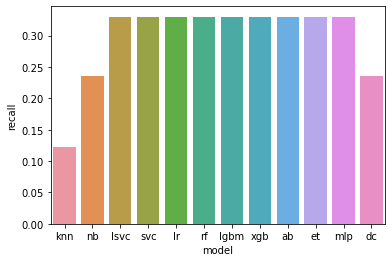

In [11]:
sns.barplot(x='model',
            y='recall',
            data=df[df['labels'] == 'weighted avg'][['model', 'recall']]);

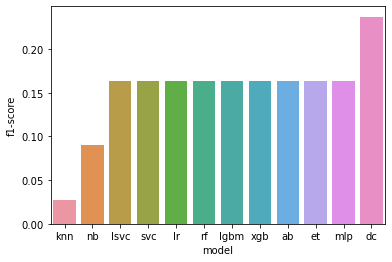

In [12]:
sns.barplot(x='model',
            y='f1-score',
            data=df[df['labels'] == 'weighted avg'][['model', 'f1-score']]);